In [1]:
import string
import pandas as pd
from collections import Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
text = pd.read_excel('Ticket Samples for Analysis.xlsx')
x = text['Customer Reported Communication']
x_data = x[:]
l1 = list(x_data)
l2 = ' '.join(l1)
lower_case = l2.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

In [6]:
tokenized_words = word_tokenize(cleaned_text, "english")
final_words = []
for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [8]:
lemma_words = []
for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)
    
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        
        if word in lemma_words:
            emotion_list.append(emotion)
            
print(emotion_list)
w = Counter(emotion_list)
print(w)

[' attached', ' powerless', ' sad', ' fearless', ' angry', ' attracted', ' alone', ' happy', ' esteemed', ' hated']
Counter({' attached': 1, ' powerless': 1, ' sad': 1, ' fearless': 1, ' angry': 1, ' attracted': 1, ' alone': 1, ' happy': 1, ' esteemed': 1, ' hated': 1})


In [11]:
def sentiment_analyse(sentiment_text):
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    if score['neg'] > score['pos']:
        print("Negative Sentiment")
    elif score['pos'] > score['neg']:
        print("Positive Sentiment")
    else:
        print("Neutral Sentiment")

In [12]:
sentiment_analyse(cleaned_text)

Positive Sentiment


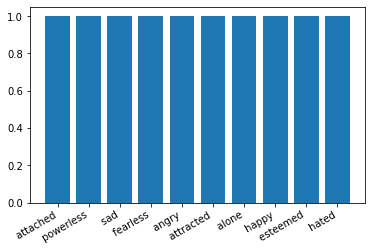

In [13]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()